# TP 1 et 2 audio (M1 SID) [EMMAB1J1 - Extraction d'information dans les signaux Texte Audio et Vidéo]

**NOM** : AZOUGAGH

**Prénom** : Fouad

**Email** : fouad.azougagh@univ-tlse3.fr

**Partie 1** : Chargement fichier audio et comparaison de la variabilité 

Lien vers le support de cours : [cours.pdf](https://moodle.univ-tlse3.fr/pluginfile.php/256486/mod_resource/content/2/cours.pdf)

Initialisation de l'environnement de TP

In [ ]:
# OS setup
!cat /etc/os-release
!apt-get install -qq bc tree sox

# Liaison avec les données
!git clone https://gitlab.com/jeromefarinas/tp-3en-n7.git

In [2]:
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
import scipy.signal
import numpy as np
from IPython.display import Audio

In [3]:
!ls tp-3en-n7/signaux/


alpha		Loc1V1.wav	Loc1V2.wav	Loc2V1.wav
Loc1V1norm.wav	Loc1V2norm.wav	Loc2V1norm.wav


Utilisez la fonction scipy.io.wavfile.read pour charger le signal Loc1V1.wav (localisé ici : tp-3en-n7/signaux/Loc1V1.wav). Renseignez- vous sur l’utilisation de cette fonction en regardant la doumentation en ligne de scipy.io.
**Quelle est la fréquence d’échantillonage de ce fichier ? Est-ce bien en 16 KHz ?**

In [132]:
(fe,signal1V1) = read("tp-3en-n7/signaux/Loc1V1.wav")

In [133]:
print("la fréquence d'échantillonage de ce fichier est de "+ str(fe) + "Hz")

la fréquence d'échantillonage de ce fichier est de 16000Hz


En effet, ce fichier est bien en 16KHz.

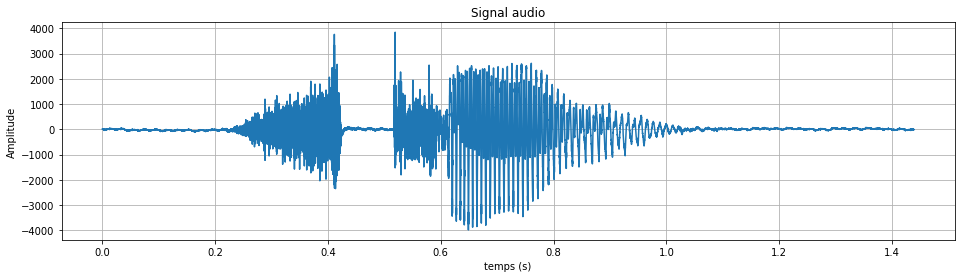

In [134]:
plt.figure(1, figsize=(16, 4))
plt.plot(np.arange(len(signal1V1))/fe,signal1V1)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()

In [135]:
# lecture du fichier
Audio(data=signal1V1, rate=fe)

***Affichage d'une partie des échantillons... (entre 9650 et 9700 par exemple)***

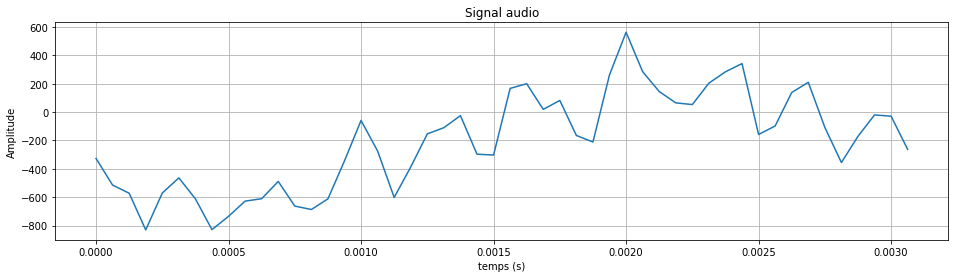

In [136]:
# Affichage des échantillons entre 9650 et 9700
nv_signal1V1 = signal1V1[9650:9700]
plt.figure(1, figsize=(16, 4))
plt.plot(np.arange(len(nv_signal1V1))/fe,nv_signal1V1)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()

Affichage du spectrogramme  : 

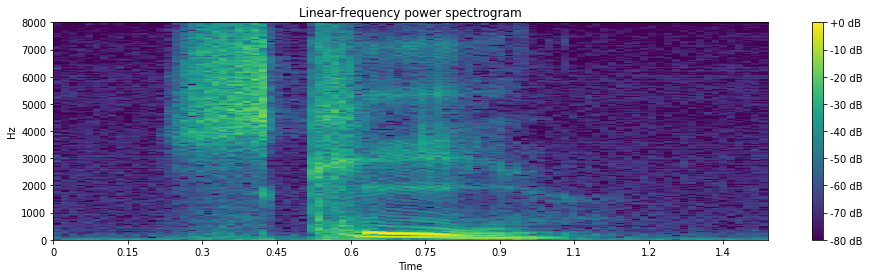

In [137]:
import librosa
import librosa.display

d, sr = librosa.load('tp-3en-n7/signaux/Loc1V1.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
plt.figure(figsize=(16, 4))
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

La lecture d'un enregistrement à 16 KHz forcée à 8 KHz va donner ceci :

In [15]:
Audio(data=signal1V1, rate=fe/2)

Et la lecture au double de la fréquence ceci :

In [138]:
Audio(data=signal1V1, rate=fe*2)

Q : ***Qu'obversez vous au niveau des fréquences ? Est-ce normal ?***

Dans le premier audio, l'audio dure plus longtemps et la voix semble plus grave.
Dans le second audio, l'audio dure moins longtemps et la voix semble plus aigue.
C'est normal car en divisant la fréquence par 2 on double sa durée (et inversement avec fe*2) et une plus basse fréquence rend une écoute plus grave (et inversement avec fe*2)

Q : ***Conformément au théorème de Shannon, une fréquence échantillonnage de 16kHz est-elle adaptée à la numérisation de la parole ? Appuyez vous sur les valeurs théoriques de l’étendue du spectre de la parole.***

Le théorème de Shannon nous indique de prendre comme fréquence d'échantillonage deux fois la fréquence maximale. Pour la parole, on a vu en cours une fréquence maximale aux alentours de 7-8 kHZ. Une fréquence de 16kHz est donc convenable.



Q : ***Qu’est ce qu’un phonème ? Combien de phonèmes apparaissent dans le signal Loc1V1 ? Isolez-les dans des variables séparées.***

Un phonème correspond au 'plus petit son' que l'on peut séparer dans un signal,("les lettres de l'alphabet phonétique"), il y'a 3 phonèmes dans ce signal.

In [16]:
Audio(data=signal1V1[2000:6500], rate = fe)
Audio(data=signal1V1[6800:8800], rate = fe)
Audio(data=signal1V1[9700:16000], rate = fe)

Q : ***Quelle est la différence entre un son voisé et un son non-voisé ?***

Un son est voisé s'il met en jeu l'utilisation des cordes vocales, il est non-voisé sinon.

***Isolez dans des variables séparées une fenetre de 512 poits de signal voisé et une autre avec du signal non voisé. Affichez les fenêtres.***

In [17]:
#Le i est un son voisé, on prendre donc comme première fenêtre :
fenetreI = Audio(data=signal1V1[10000:10512], rate = fe)

In [18]:
#Le s n'étant pas voisé, on peut prendre comme seconde fenêtre :
fenetreS = Audio(data=signal1V1[3000:3512], rate = fe)

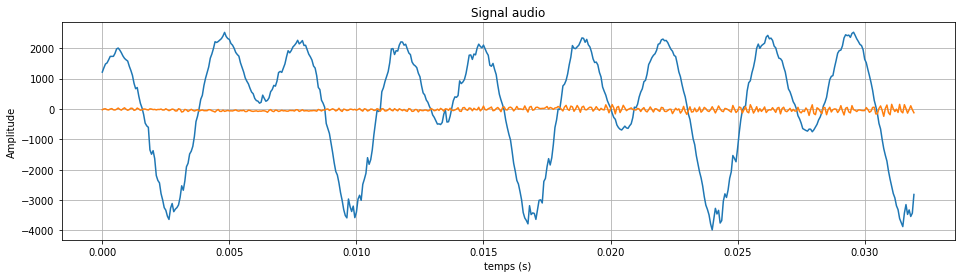

In [19]:
plt.figure(1, figsize=(16, 4))
plt.plot(np.arange(len(signal1V1[10000:10512]))/fe,signal1V1[10000:10512])
plt.plot(np.arange(len(signal1V1[3000:3512]))/fe,signal1V1[3500:4012])
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()

**Le même mot est prononcé une nouvelle fois par le même locuteur : Loc1V2.wav. Affichez les signaux, écoutez les, et observerez les différences existantes entre ces deux réalisations.**

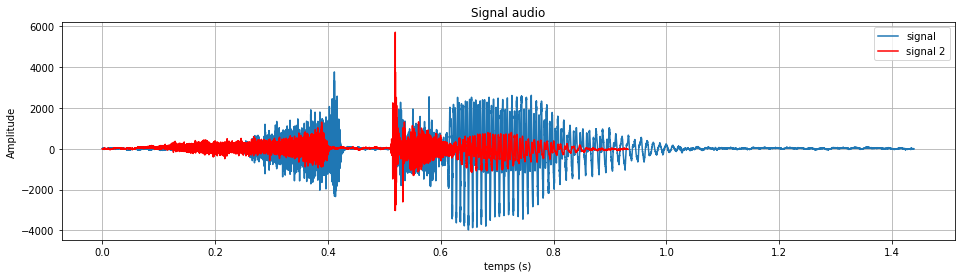

In [28]:
(fe,signal1V2) = scipy.io.wavfile.read("tp-3en-n7/signaux/Loc1V2.wav")
plt.figure(1, figsize=(16, 4))
plt.plot(np.arange(len(signal1V1))/fe,signal1V1)
plt.plot(np.arange(len(signal1V2))/fe,signal1V2, 'red')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.legend(["signal","signal 2"])
plt.grid(True)
plt.show()

In [21]:
Audio(data=signal1V1, rate = fe)

In [25]:
Audio(data=signal1V2, rate = fe)

Sur le premier audio de ce locuteur on a l'impression qu'il insiste plus sur la fin du mot là ou sur le deuxième audio on entend un "s" maintenant plus longtemps. Graphiquement on le voit avec le signal rouge(audio2) qui débute plus tôt que le signal bleu(audio1), là où le signal bleu termine plus en retard sur la fin de l'audio.

A l'écoute, le second audio a aussi une tonalité plus faible que le premier.Graphiquement on le voit avec des amplitudes plus basse sur le signal rouge.

***Comparez ensuite les réalisation du même mot par deux locuteurs différents (fichiers Loc1V1 et Loc2V1). Discutez les causes possibles des différences observées entre deux réalisations.***

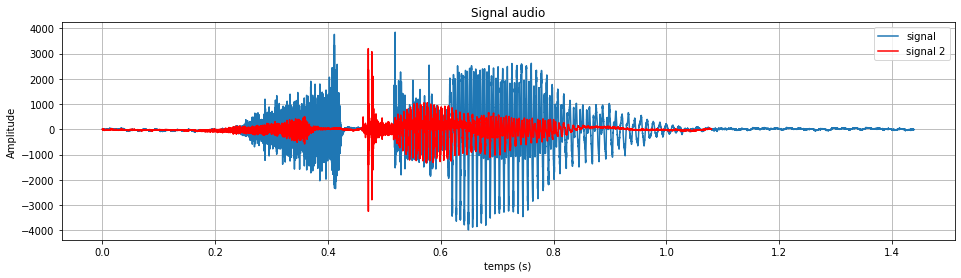

In [29]:
(fe,signal2V1) = scipy.io.wavfile.read("tp-3en-n7/signaux/Loc2V1.wav")
plt.figure(1, figsize=(16, 4))
plt.plot(np.arange(len(signal1V1))/fe,signal1V1)
plt.plot(np.arange(len(signal2V1))/fe,signal2V1, 'red')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.legend(["signal","signal 2"])
plt.grid(True)
plt.show()

In [23]:
Audio(data=signal1V1, rate = fe)

In [26]:
Audio(data=signal2V1, rate = fe)

Les deux locuteurs prononcent le même mot et on obtient tout de même deux graphiques différents, à l'écoute on semble remarquer que le premier locuteur parle plus lentement et insiste plus que le deuxième sur le "s" et le "k", le second a une voix plus aigue et semble parler plus loin du micro.

Tout ceci peut avoir une influence sur les différences observées, de manière générale, l'age, le sexe et les différentes tonalités de voix des gens peuvent influer sur la représentation graphique de leurs paroles.

***Enregistrez votre propre voix (vous pouvez utiliser le programme wavesurfer). Utilisez par exemple cette phrase : "Le public est ému par Debussy". Affichez le signal, le spectrogramme et repérez les différents phonèmes qui composent votre production. Comparez avec ce qui a été fait en cours.***

In [31]:
from google.colab import files
uploaded = files.upload()
!ls

Saving record.wav to record (1).wav
'record (1).wav'   record.wav   sample_data   tp-3en-n7


In [139]:
(fe,signalMoi) = read("record.wav")
Audio(data=signalMoi[:,0], rate=fe)

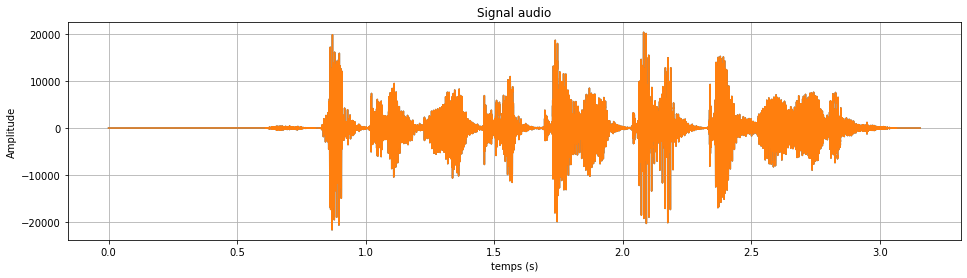

In [33]:
plt.figure(1, figsize=(16, 4))
plt.plot(np.arange(len(signalMoi))/fe,signalMoi)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()

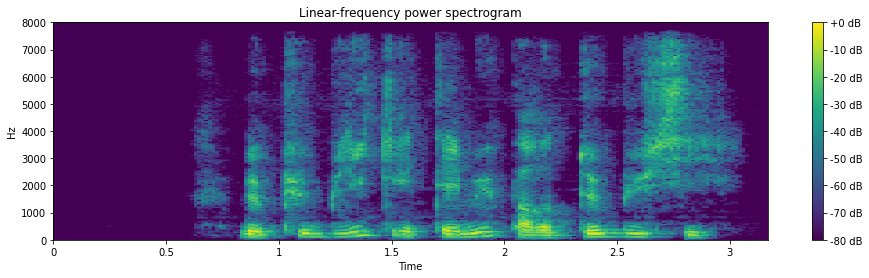

In [34]:
import librosa
import librosa.display
d, sr = librosa.load('record.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
plt.figure(figsize=(16, 4))
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

Sur le spectogramme et le signal on peut reperer entre 8 et 10 "sections" qui correspondent aux phonèmes de ma phrase. On a vu en cours que cette phrase s'écrivait en phonétique avec 10 'lettres', cela correspond bien.

***Concluez sur cette partie en prenant en considération le nombre important de causes extérieures de la variabilité temporelle du signal de parole. Ces phénomènes limitent les possibilités d’une analyse plus poussée dans le domaine temporel dans lequel le signal de parole se comporte comme un signal aléatoire.***

On a vu que selon les personnes on pouvait se retrouver avec des représentations temporelles vraiments différentes (amplitudes plus ou moins élevées, signal qui commence plus ou moins longtemps..) que ce soit le timbre de voix (aigue/grave) qui change, la tonalité, l'accent ou d'autres varibales externes.

Pour une même personne il peut aussi y avoir des différences : on peut aller plus ou moins vite en fonction des fois, la voix peut également changé (muer, s'enrhumer..). 

Tout ces facteurs peuvent compliquer l'analyse poussée d'un signal dans le domaine temporel, sans doute qu'un domaine analogue pourrait être plus efficace.

**Partie 2** : Paramétrisation

In [35]:
!tree tp-3en-n7/signaux/alpha/

tp-3en-n7/signaux/alpha/
├── mots_inconnus
│   ├── alpha.wav
│   ├── bravo.wav
│   ├── charlie.wav
│   ├── delta.wav
│   ├── echo.wav
│   ├── foxtrott.wav
│   ├── golf.wav
│   ├── hotel.wav
│   ├── india.wav
│   ├── juliett.wav
│   ├── kilo.wav
│   ├── lima.wav
│   └── mike.wav
└── references
    ├── alpha.wav
    ├── bravo.wav
    ├── charlie.wav
    ├── delta.wav
    ├── echo.wav
    ├── foxtrott.wav
    ├── golf.wav
    ├── hotel.wav
    ├── india.wav
    ├── juliett.wav
    ├── kilo.wav
    ├── lima.wav
    └── mike.wav

2 directories, 26 files


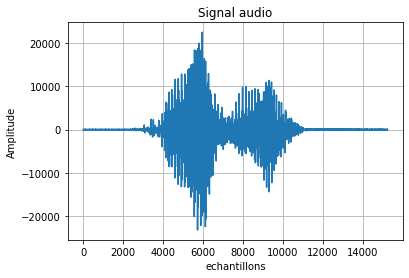

In [107]:
(fe,signal) =  scipy.io.wavfile.read("tp-3en-n7/signaux/alpha/references/bravo.wav")
# Affichage du signal
plt.figure(1)
plt.plot(np.arange(len(signal)),signal)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()
# lecture du fichier
Audio(data=signal, rate=fe)

Nous allons commencer par travailler sur un extrait voisé du signal :

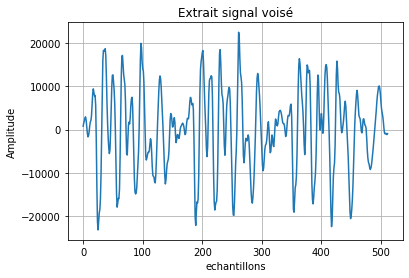

In [108]:
extrait = signal[5700:6212]
# Affichage du signal
plt.figure(1)
plt.plot(np.arange(len(extrait)),extrait)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Extrait signal voisé')
plt.grid(True)
plt.show()

In [40]:
Audio( data= extrait, rate = fe)

***Affichez une fenetre hamming de 512 points. Puis créez la variable extrait_fenetre qui resulte de la multiplication point par point de la fenetre de hamming et de l'extrait de signal. Affichez le signal résultant.***

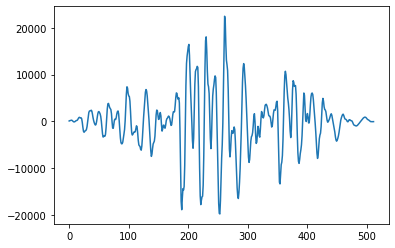

In [109]:
np.hamming(512)
extrait_fenetre = np.hamming(512)*extrait 
plt.plot(extrait_fenetre)

***Affichez le spectre de puissance de la transformée de Fourier de l'extrait fenetré. Représentez les fréquences en abscisse. Vous pouvez utiliser la fonction np.fft.fft pour calculer la transformée de Fourier ou bien utiliser son équivalent sur librosa.***

(0.0, 3000.0)

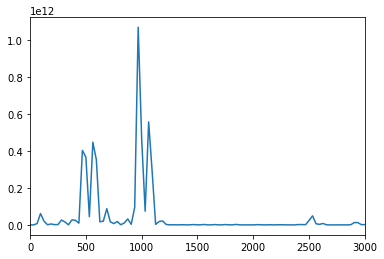

In [110]:
trans_fourier =np.abs(np.fft.fft(extrait_fenetre))
plt.plot(np.fft.fftfreq(512,1/fe)[:256],np.abs(trans_fourier[:256])**2)
plt.xlim(0,3000)

***Affichez un spectrogramme du signal de départ.***

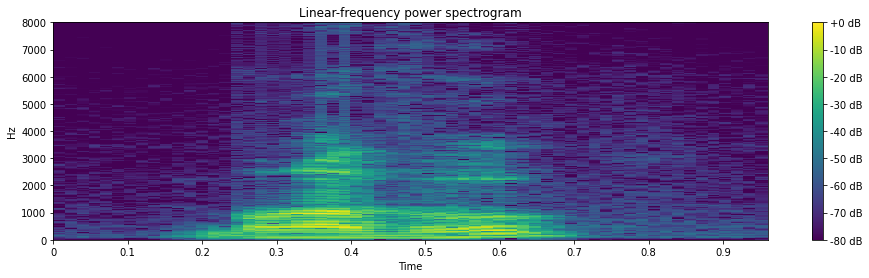

In [111]:
d, sr = librosa.load('tp-3en-n7/signaux/alpha/references/bravo.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hamming(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
plt.figure(figsize=(16, 4))
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()


***Calculez le log énergie du signal sur des fenêtres de 512 points avec recouvrement sur la moitié. Affichez les valeurs ainsi calculées aligné avec le signal.***

$E=\log\left(\sum_{i=1}^{n}x_{i}^{2}\right)$

In [112]:
def calculLog(liste):
    somme = 0
    for element in liste:
        somme += element **2
    return (np.log(somme))

i = 0
energie = list()
while (i+512 < len(signal)):
    energie.append(calculLog(signal[i:i+512]))
    i += 256

print(len(energie))

58


[12.358227048407556, 11.986983364544004, 12.22385362282526, 12.127061905195129, 11.8863424751095, 12.154226566806564, 12.404033764311809, 14.75033919614344, 15.839639554668938, 17.268661127902774, 17.934142040738763, 19.701629578190985, 20.111185603040436, 20.38608447115253, 21.945769266976228, 22.716017007199728, 23.006208245678707, 23.291347863395714, 23.604800764424855, 24.10952726812456, 24.391830807419556, 24.547294730397226, 24.345181178820393, 23.433554543724252, 22.293196059533358, 21.3885850416852, 21.01965056148124, 21.11458309250042, 21.589925053334355, 22.24409605189447, 22.408469559660883, 22.556365458267898, 22.896887446799454, 23.246128360652232, 23.453331985972667, 23.221840401935133, 22.590369675769004, 21.915811806964232, 21.41302928312883, 20.68547107136648, 19.548607866592853, 18.200993064229042, 15.51981273261441, 14.457451808741324, 14.30717171076901, 14.16924297691953, 14.10043082012659, 13.99941419594088, 13.774837510684161, 13.723533417408282, 13.64716882645780

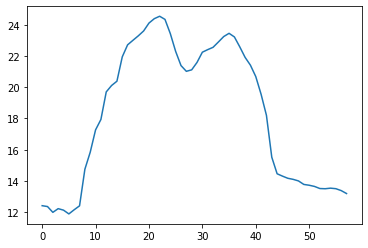

In [113]:
plt.plot(energie)
print(energie[1:])

***Peut-on repérer les voyelles facilement avec cette représentation ?***

Oui, les voyelles correspondent aux pics les plus élevés, donc ici deux voyelles.

***Calculez le cepstre de l'extrait de signal. Affichez le. Où se trouve l'excitation liée à la vibration des cordes vocales ?***

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


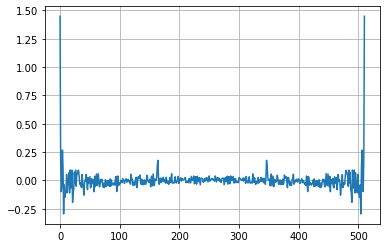

In [114]:
t2 = np.log(trans_fourier)
t3 = np.fft.ifft(t2)
plt.plot(t3[1:]) 
plt.grid(True)
plt.show()

La fréquence fondamentale se situe aux aletnours de 150.

***En utilisant librosa, affichez une matrice des 12 premiers coefficients MFCC 
du signal de départ.***

(12, 30)


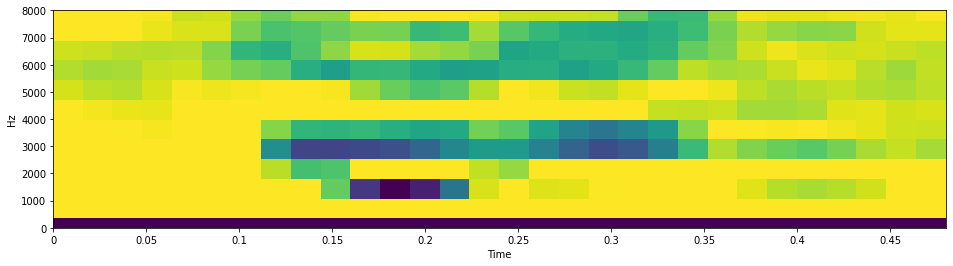

In [115]:
d, sr = librosa.load('tp-3en-n7/signaux/alpha/references/bravo.wav', sr=16000, mono=True) 
Matrice = librosa.feature.mfcc(y=d, sr=sr, n_mfcc=12)
print(Matrice.shape)
plt.figure(figsize=(16, 4))
librosa.display.specshow(Matrice, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.show()

***Ajoutez a cette matrice votre propre calcul de l'énergie normalisé. Y a-t-il une corrélation avec un des coefficients MFCC ?***

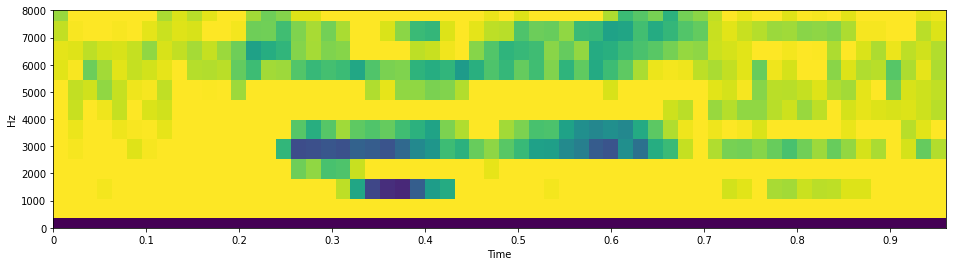

In [116]:
d, sr = librosa.load('tp-3en-n7/signaux/alpha/references/bravo.wav', sr=16000, mono=True) 
Matrice = librosa.feature.mfcc(y=d, sr=sr, n_mfcc=12, hop_length = 256, n_fft = 512)
plt.figure(figsize=(16, 4))
librosa.display.specshow(Matrice, sr=16000, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0,hop_length=256)
plt.show()

In [117]:
energie = [0] + energie + [0]

In [118]:
mfcc = np.concatenate((Matrice,[energie]), axis = 0)

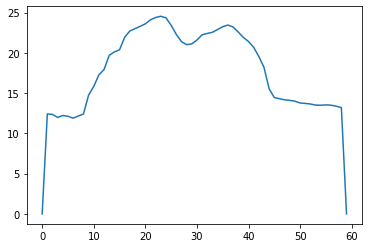

In [119]:
# plt.plot(energie[1:59])
plt.plot(energie)

In [120]:
#A la recherche d'une corrélation
# plt.plot(mfcc[1,:])
liste = list()
for i in range (2,len(mfcc[1,:])-1):
  liste.append(energie[i]/mfcc[1,i])
print(liste)

[0.1929834475594497, 0.25274137936178886, 0.19590914956885103, 0.21022566051486113, 0.2505077847607897, 0.21456471881821812, 0.19617838198264131, 0.1769635732546806, 0.15416072950283968, 0.15774905586760532, 0.13365957876095494, 0.1270787172868627, 0.13420261545611561, 0.11013518987045023, 0.10198367937648568, 0.0967170033543302, 0.0954775473366919, 0.10218153719321027, 0.11337463450308075, 0.12226421569221435, 0.14212012658683226, 0.14693720988027306, 0.14288928798746434, 0.13135679199377856, 0.12004884402148688, 0.13565259117856632, 0.1480774169132204, 0.14638368086105505, 0.1333164029187079, 0.12497087549717872, 0.12599578979479156, 0.12840431823847687, 0.12978711519447259, 0.12612153192075606, 0.12802456578979052, 0.1253431096765176, 0.12216118792479581, 0.1139273997463829, 0.12189799317147622, 0.13447153454315416, 0.1417953269743589, 0.1678707295035863, 0.17123361835533693, 0.18209044984942055, 0.2331013708278611, 0.21429821512986957, 0.2676611736616873, 0.2274610774811907, 0.2638

In [130]:
print(Matrice[2])

[  2.68051459   7.21329058   3.29912168  -1.53935101   7.99677868
  17.2525234    8.39571974   5.0008603    9.9332196   25.09978304
  30.59768269  29.06626828  63.13547905  66.13804122  72.25648233
  57.09897914  41.82712243  22.17542015  14.37116171  -7.90742533
 -32.63618947 -63.0058693  -69.49923599 -71.21911045 -56.45661434
 -35.75335866 -30.96918613  10.77040947  28.24105302  28.31210324
  28.90618764  15.22126449   8.77311278  -1.43028964   6.58247155
  21.26907477  11.92207661   2.36378058  17.83539406  34.30128215
  37.58580772  32.77698144  25.99165584  20.76481225   9.59917793
  -5.57264346  -3.68760779  -0.18453752 -10.40631056 -11.15206707
  -6.32967234  -8.13812914  -7.81757819  -4.0975687   -4.28252433
   2.97906093   5.51142025   1.95500188  10.65456741   6.38666118]


Pour le deuxième coefficient du mfcc, on remarque un coefficient de proportionnalité d'environ 0.11 par rapport à énergie.

***En utilisant les MFCC, mettez en place un détecteur d'activité vocale afin de filtrer les fichiers que vous avez à traiter : visualisez le résultats sur les signaux "references" (affichage du signal et matérialisation des zones de silence). Vous ne devez pas altérer les zones de silences de moins de 300 ms comprises dans les zones de parole.***

La matrice est ici en mel, on récupère donc toutes les valeurs des mfcc au dessus de 136

In [131]:
Matrice136 = []
for i in range (0,len(Matrice)):
    colonne = []
    for e in range (0,len(Matrice[i])):
        if (Matrice[i][e] >= 136):
            colonne.append(Matrice[i][e])
        else :
            colonne.append(0)
print(Matrice136)


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 155.0348476819865, 149.85688270447167, 185.10055228607916, 215.18903221721035, 234.87097634712532, 240.95935523510718, 227.94086390925202, 208.20178047659715, 197.19201674525465, 171.6282654203568, 167.05975804494165, 170.37793050628255, 178.39621528542, 185.70104727991568, 157.67177652751454, 141.9504135043066, 144.24137286547693, 161.94500137015552, 177.99424036520125, 177.85093927469637, 175.66672030745454, 176.41880253283102, 184.31530291955303, 183.1939975057739, 185.26619023467254, 184.9226424490564, 192.36647071513664, 175.6635095132921, 153.8278799423395, 137.8649655367547, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


J'ai trouvé seulement le deuxième mfcc avec des valeurs qui correspondraient à une activité vocale, c'est le coefficient que j'avais trouvé correlé avec mon énergie à la question d'avant.